In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

ticker = 'AMZN'; kernel = 'rbf'

df = pd.read_csv('{}.csv'.format(ticker))

X = np.array(df.index)[:int(df.shape[0]*0.8)].reshape(-1, 1)
y = df.iloc[:int(df.shape[0]*0.8),5].values.astype(float).reshape(-1, 1)
X_test = np.array(df.index)[int(df.shape[0]*0.8):].reshape(-1, 1)
y_test = df.iloc[int(df.shape[0]*0.8):,5].values.astype(float).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

regressor = SVR(kernel=kernel)
regressor.fit(X,y.ravel())
y_pred = sc_y.inverse_transform((regressor.predict(X_test.reshape(-1, 1))))

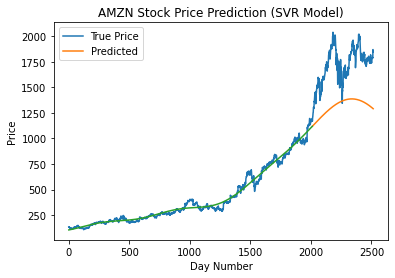

In [0]:
train_pred = sc_y.inverse_transform(regressor.predict(X))

plt.clf()
plt.plot(df['Adj Close'], label="True Price")
plt.plot(range(len(y),len(y)+len(y_pred)),y_pred, label='Predicted')
plt.plot(X, train_pred)
plt.title('{} Stock Price Prediction (SVR Model)'.format(ticker))
plt.xlabel('Day Number')
plt.ylabel('Price')
plt.legend()
plt.savefig('SVR_{}_{}_zoomedout.png'.format(ticker, kernel))

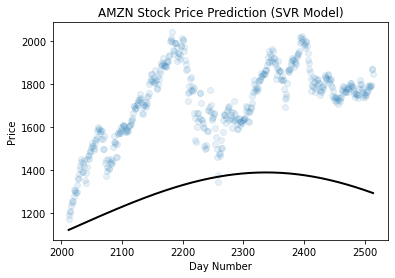

In [0]:
plt.clf()
plt.scatter(X_test, y_test,alpha=0.1)
plt.plot(X_test, y_pred, color = 'black',linewidth=2)
plt.title('{} Stock Price Prediction (SVR Model)'.format(ticker))
plt.xlabel('Day Number')
plt.ylabel('Price')
plt.savefig('SVR_{}_{}_zoomedin.png'.format(ticker, kernel))

In [0]:
# Prints the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

425.1585946989589


In [0]:
with open("rsme.txt", "a+") as myfile:
    myfile.write("{} {} svr".format(ticker,rmse))

In [0]:
new_df = pd.DataFrame(y_pred, columns = ['pred_test'])
new_df.to_csv('{}_SVR_pred_test.csv'.format(ticker))
new_df = pd.DataFrame(train_pred, columns = ['pred_train'])
new_df.to_csv('{}_SVR_pred_train.csv'.format(ticker))